# Ahoy!
## Olá e seja muito bem vendo ao tutorial de scikit-learn
- O que é o scikit-learn?
> Biblioteca python open-scource para fazer machine learning
- O que é machine learning
> Exemplo: Gerar modelos que analisam dados amplos e complexos de forma automática para entregar resultados precisos em grande escala

# Instalação
<p>Há duas formas de instalar o scikit-learn, pelo pip e pelo conda, o conda cria um ambiente virtual em sua maquina, por isso, acho ele uma melhor opção<p/>
<br>
**Requisitos**<br>
- Python

*****
## Windows
### PIP
1. Instale o python 3 [Aqui] (https://www.python.org/downloads/)

2. Abra seu terminal e digite
```
pip install -U scikit-learn
```
3. Pronto, você já tem o sklearn :)

4. Recomendo instalar outros pacotes como o 
> numPy(trabalhar com matematica)<br>
> pandas(trabalhar com tabelas)<br>
> matplotlib(trabalhar com graficos)<br>

### CONDA
1. Instale o conda [Aqui](https://docs.conda.io/projects/conda/en/latest/user-guide/install/windows.html)
2. em seu terminal
```
conda install scikit-learn
```

## Linux

### Arch Linux
```
sudo pacman -S python-scikit-learn
```
### Debian / Ubuntu
```
sudo apt-get install python3-sklearn python3-sklearn-lib python3-sklearn-doc
```
### Fedora
```
sudo dnf install python3-scikit-learn
```

## CONDA
1. Instale o conda [Aqui](https://docs.conda.io/projects/conda/en/latest/user-guide/install/windows.html)
2. em seu terminal
```
conda install scikit-learn
```

# Mãos a obra 
<br>

## Aprendizado supervisionado
Você fala pra máquina o que são caracteristicas de um modelo e o que ela tem que prever (isso irá ficar mais claro nos exemplos)

## Aprendizado não supervisionado
É como jogar um monte de saquinhos pra cima e dividí-los por onde cada um caiu



# Problemas de Classificação
São problemas onde o output (resultado) será binário, por exemplo, X pessoa sobreviveu ou não ao titanic, dado n caracteristicas sobre ela
# Problemas de Regressão
São problemas onde o output é um valor, exemplo, dado n caracteristicas sobre uma casa, quanto ela vale?


# Aprendizado Supervisionado

## Modelos Lineares
São, geralmente regressões (ax + b), na qual o valor procurado é linear aos outros valores


### **Exemplo**

Tenho um grafico com 10 apartamentos, o gráfico me diz que, a cada quarto, o valor do apartamento sobe em 2000 dolares, sabendo que o valor de um apartamento com 2 quartos é 15000 dolares, qual será o valor do mesmo apartamento se ele tiver 3 quartos? <br>


**Problema que pode ser solucionado com modelo linear**

- caracteristica(X): n de quartos
- predição(y): valor do Apartamento

In [1]:
# Minimo Quadrados ordinários
import matplotlib.pyplot as plt #plot de gráficos
import numpy as np # matematicas
from sklearn import datasets #datasets de exemplo
from sklearn import linear_model #modelos lineares
from sklearn.metrics import mean_squared_error, r2_score #metricas de acertividade do modelo

#Atribuo a duas variaveis o dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# iremos usar apenas uma caracteristica (apenas um X)
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Divide as caracteristicas entre treino e teste
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split os resultados em treino e teste
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

#instancio a regressão
regr = linear_model.LinearRegression()

#Treino o modelo usando os sets de treino
regr.fit(diabetes_X_train, diabetes_y_train)

#Faço predições utilizando os dados de teste
diabetes_y_pred = regr.predict(diabetes_X_test)

#Coeficientes
print('Coefficients: \n', regr.coef_)
#erro médio quadrado
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Coeficiente de determinação, 1 == predição perfeita
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

#o que é erro medio quadrado
acc = []
for i in range(len(diabetes_y_pred)):
    variance = (diabetes_y_pred[i] - diabetes_y_test[i])**2
    #variancia = predição - valor real ^2
    #por que elevar ao quadrado? --> pros valores não ficarem negativos
    acc.append(variance)      
print('erro medio quadrado', round(sum(acc)/len(acc),2)) #erro médio quadrado

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47
erro medio quadrado 2548.07


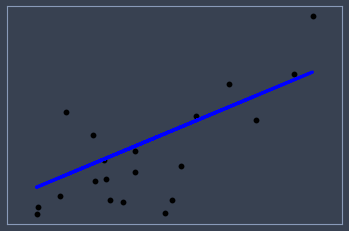

In [2]:
# Gráfico
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Árvores de decisão
![uma arvorezes de decizones](https://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/uploads/RTEmagicC_arv_dec4_01.gif.gif)
Arvores de decisão são diversas condições que levam a uma decisão

In [19]:
import matplotlib.pyplot as plt # plots
import pandas as pd # datasets
from sklearn.tree import DecisionTreeClassifier # modelo
from sklearn.tree import plot_tree # plots
from sklearn.model_selection import train_test_split #divisão
#dataframe de exemplo
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')

#Separei os dados
X = df.drop(['species'],1)
y = df['species']

#dividi os dados em treino e test
X_test,X_train,y_test,y_train = train_test_split(X,y) 


clf = DecisionTreeClassifier()
clf.fit(X_train,y_train) #treino
predict = clf.predict(X_test) #test

aux = 0
for i,j in enumerate(y_test):
    if j == predict[i]:
       aux = aux + 1
print('accuracy: ',round(aux / len(y_test)*100,2),'%')


accuracy:  96.43 %


Nossa árvore de decisão ![alt](https://i.imgur.com/BBOMFDh.png)